https://github.com/jmschrei/pomegranate/blob/master/tutorials/Tutorial_8_Semisupervised_Learning.ipynb

## Approach
* supervised first to learn clusters
* unsupervised EM afterwards

In [2]:
%pylab inline
from pomegranate import *
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_blobs
import seaborn, time
seaborn.set_style('whitegrid')
numpy.random.seed(1)

Populating the interactive namespace from numpy and matplotlib


In [3]:
X, y = make_blobs(10000, 2, 3, cluster_std=2)
x_min, x_max = X[:,0].min()-2, X[:,0].max()+2
y_min, y_max = X[:,1].min()-2, X[:,1].max()+2

X_train = X[:5000]
y_train = y[:5000]

# Set the majority of samples to unlabeled.
y_train[numpy.random.choice(5000, size=4950, replace=False)] = -1

# Inject noise into the problem
X_train[y_train != -1] += 2.5

X_test = X[5000:]
y_test = y[5000:]

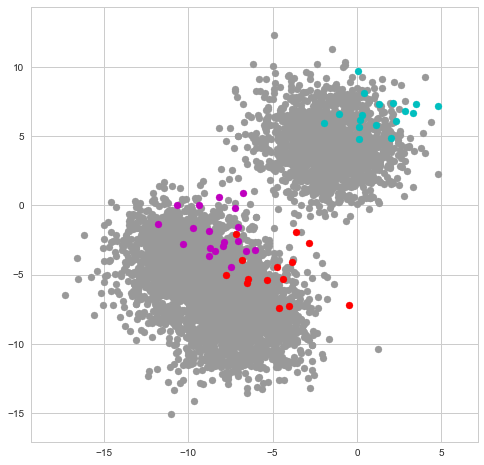

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='0.6')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='c')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='m')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='r')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [5]:
model_a = NaiveBayes.from_samples(NormalDistribution, X_train[y_train != -1], y_train[y_train != -1])
print "Supervised Learning Accuracy: {}".format((model_a.predict(X_test) == y_test).mean())

model_b = NaiveBayes.from_samples(NormalDistribution, X_train, y_train)
print "Semisupervised Learning Accuracy: {}".format((model_b.predict(X_test) == y_test).mean())

Supervised Learning Accuracy: 0.8706
Semisupervised Learning Accuracy: 0.9274


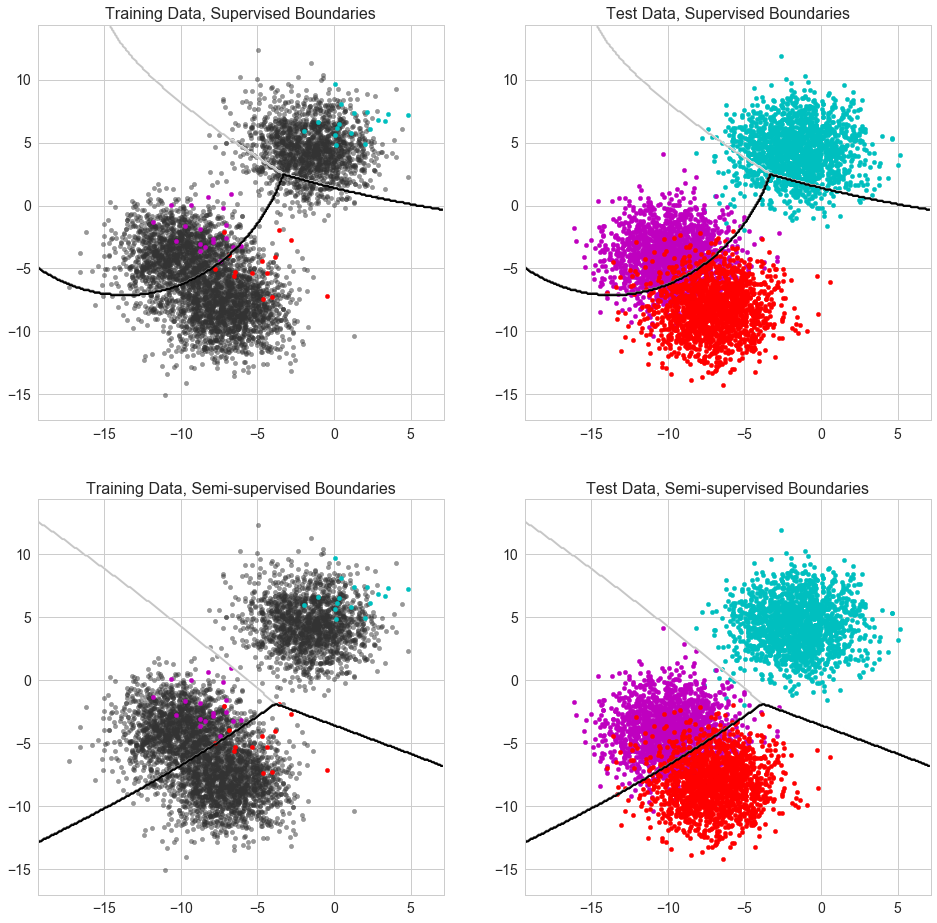

In [6]:
def plot_contour(X, y, Z):
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='0.2', alpha=0.5, s=20)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='c', s=20)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='m', s=20)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], color='r', s=20)
    plt.contour(xx, yy, Z)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.1), numpy.arange(y_min, y_max, 0.1))
Z1 = model_a.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = model_b.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.title("Training Data, Supervised Boundaries", fontsize=16)
plot_contour(X_train, y_train, Z1)

plt.subplot(223)
plt.title("Training Data, Semi-supervised Boundaries", fontsize=16)
plot_contour(X_train, y_train, Z2)

plt.subplot(222)
plt.title("Test Data, Supervised Boundaries", fontsize=16)
plot_contour(X_test, y_test, Z1)

plt.subplot(224)
plt.title("Test Data, Semi-supervised Boundaries", fontsize=16)
plot_contour(X_test, y_test, Z2)
plt.show()

In [7]:
print "Supervised Learning: "
%timeit NaiveBayes.from_samples(NormalDistribution, X_train[y_train != -1], y_train[y_train != -1])
print
print "Semi-supervised Learning: "
%timeit NaiveBayes.from_samples(NormalDistribution, X_train, y_train)
print
print "Label Propagation (sklearn): "
%timeit LabelPropagation().fit(X_train, y_train)

Supervised Learning: 
1000 loops, best of 3: 296 µs per loop

Semi-supervised Learning: 
10 loops, best of 3: 19.4 ms per loop

Label Propagation (sklearn): 
1 loop, best of 3: 1.36 s per loop


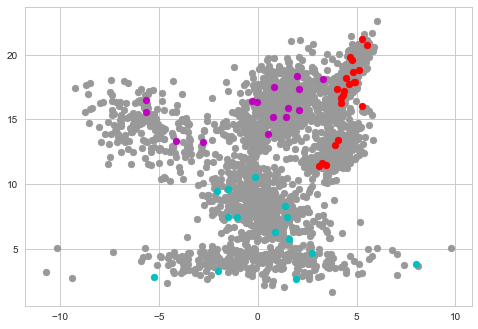

In [8]:
X = numpy.empty(shape=(0, 2))
X = numpy.concatenate((X, numpy.random.normal(4, 1, size=(300, 2)).dot([[-2, 0.5], [2, 0.5]])))
X = numpy.concatenate((X, numpy.random.normal(3, 1, size=(650, 2)).dot([[-1, 2], [1, 0.8]])))
X = numpy.concatenate((X, numpy.random.normal(7, 1, size=(800, 2)).dot([[-0.75, 0.8], [0.9, 1.5]])))
X = numpy.concatenate((X, numpy.random.normal(6, 1, size=(220, 2)).dot([[-1.5, 1.2], [0.6, 1.2]])))
X = numpy.concatenate((X, numpy.random.normal(8, 1, size=(350, 2)).dot([[-0.2, 0.8], [0.7, 0.8]])))
X = numpy.concatenate((X, numpy.random.normal(9, 1, size=(650, 2)).dot([[-0.0, 0.8], [0.5, 1.2]])))
x_min, x_max = X[:,0].min()-2, X[:,0].max()+2
y_min, y_max = X[:,1].min()-2, X[:,1].max()+2

y = numpy.concatenate((numpy.zeros(950), numpy.ones(1020), numpy.ones(1000)*2))
idxs = numpy.arange(2970)
numpy.random.shuffle(idxs)

X = X[idxs]
y = y[idxs]

X_train, X_test = X[:2500], X[2500:]
y_train, y_test = y[:2500], y[2500:]
y_train[numpy.random.choice(2500, size=2450, replace=False)] = -1

plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='0.6')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='c')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='m')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='r')
plt.show()

In [9]:
d1 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X_train[y_train == 0])
d2 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X_train[y_train == 1])
d3 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X_train[y_train == 2])
model_a = BayesClassifier([d1, d2, d3]).fit(X_train[y_train != -1], y_train[y_train != -1])
print "Supervised Learning Accuracy: {}".format((model_a.predict(X_test) == y_test).mean())

d1 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X_train[y_train == 0])
d2 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X_train[y_train == 1])
d3 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X_train[y_train == 2])
model_b = BayesClassifier([d1, d2, d3])
model_b.fit(X_train, y_train)
print "Semisupervised Learning Accuracy: {}".format((model_b.predict(X_test) == y_test).mean())

Supervised Learning Accuracy: 0.929787234043
Semisupervised Learning Accuracy: 0.96170212766
